## Vector-valued function with Random Fourier Features

### Imports

In [519]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

### Values

In [520]:

dimension = 2
sigma = 10
sigma2 = 2*sigma**2

# Random Fourier features
m = 20 # number of samples
w = np.array([randn(m) / sigma, randn(m) / sigma]) # w is the same size as the dimensions times the number of samples
b = np.random.rand(m)*2*np.pi # b is the same size as number of samples

n = 300 # number of points

x1 = randn(n)/2
x2 =  randn(n)/2
x_vector = np.array([x1, x2])
# x_vector = np.block([x1,x2])

noise = randn(n) * 1e-1
#y1 = np.cos(x1) + noise
#y2 = np.sin(x2) + noise

y1 = 1+np.sin(x1/10) + x1**2 + noise
y2 = 0.5 * x2**2 + np.exp(x2) + noise

y = []
for i in range(n):
    y.append(y1[i])
    y.append(y2[i])

y = np.array(y)

lam = 0.000001 # Regularization parameter

### Gaussian Kernel

In [521]:
def k_gauss(x, z):
    k = np.exp(-((np.linalg.norm(x-z))**2)/(2*sigma**2))
    return k

def k_matrix(x, z, dim):
    k = k_gauss(x, z)
    k_matrix = k *np.eye(dim)
    return k_matrix

def K_gauss(x, n, dim):
    K = np.zeros((dim*n, dim*n))
    for i in range(0, n):
        for j in range(0, n):
            k = k_gauss(x[:,i], x[:,j])
            K[i*dim][j*dim] = k
            K[i*dim+1][j*dim+1] = k
    return K

K = K_gauss(x_vector, n, dimension)
print(K)

#### Alpha

In [ ]:
# Returns a vector with length dim * n
def alpha(x, y, lam, n, dim):
    K = K_gauss(x, n, dim)
    alpha_vector = np.linalg.inv((K + lam*np.eye(dim*n))) @ y
    alpha_reshape = [alpha_vector[::2], alpha_vector[1::2]]
    return np.array(alpha_reshape)

alpha_ = alpha(x_vector, y, lam, n, dimension)
alpha_

array([[-1.48672513e+04,  5.92890613e+04,  3.72420622e+04,
        -6.14066619e+03, -7.33071709e+04, -4.11108138e+04,
         1.05183136e+05, -4.65785136e+04,  4.14149490e+04,
        -3.90096528e+04,  2.84884547e+04,  1.22895280e+05,
         9.42001364e+03,  5.26675124e+03, -1.66327823e+05,
         2.64944389e+04,  5.02007266e+04, -1.97893617e+04,
         4.13093664e+04,  8.44721919e+03, -4.15346614e+04,
        -1.33884176e+05, -1.22181992e+05, -4.69701297e+04,
         1.23473330e+05,  7.45635406e+04, -1.40094356e+05,
        -8.02357742e+04, -8.85707255e+04, -2.55559552e+04,
         4.85300104e+04, -3.85546375e+04, -1.30317201e+05,
        -1.63468275e+05, -4.48222895e+04, -5.68724702e+04,
         5.56420751e+03, -1.99071573e+05,  1.13969877e+04,
        -1.34508667e+05, -1.60689411e+04, -1.15494180e+05,
         4.36544335e+04, -1.31564540e+05, -8.22866216e+04,
        -2.34537745e+05,  1.58194542e+05,  1.09186563e+05,
         7.33481877e+04, -1.82963272e+04, -1.39015638e+0

#### Estimated function

In [ ]:
def estiamted_function(alpha, x, n, dim):
    function = np.zeros((2, n))
    for i in range(n):
        sum = np.zeros((2))
        x_i = x[:, i]
        for j in range(n):
            k = k_gauss(x_i, x[:, j])
            kernel = k*np.eye(dim)
            sum = sum + kernel@alpha[:, j]
        function[:, i] = sum 
    return function

func = estiamted_function(alpha_, x_vector, n, dimension)
func

array([[1.0667482 , 1.00468918, 1.288837  , 1.66057343, 1.33163016,
        1.80243944, 1.04820813, 2.29885213, 1.84496701, 1.6643875 ,
        1.47735605, 1.00541644, 1.04861943, 0.99993688, 1.15064636,
        1.08316315, 2.67375531, 1.18224732, 1.04199706, 1.48228511,
        1.02035247, 1.07334332, 1.50243002, 1.0606857 , 1.19052606,
        1.01485308, 1.00422665, 2.35675141, 1.60932923, 1.55442123,
        1.05385549, 1.11396644, 1.11381007, 1.37715392, 1.0033312 ,
        1.25102425, 2.01594794, 1.08663224, 1.35524828, 1.03416726,
        1.13767196, 1.08631816, 1.26690924, 1.05446946, 1.07891651,
        1.00193524, 1.47756131, 1.4166329 , 1.41965528, 1.03928181,
        1.01011006, 1.31395984, 1.59285613, 0.99887476, 1.0022174 ,
        1.00964653, 2.35140977, 1.01586108, 1.11637209, 1.20991632,
        1.00414221, 1.14480875, 1.09669653, 1.14149713, 1.77957131,
        2.00960082, 1.3380181 , 1.00816438, 1.39973008, 1.04474463,
        1.11879834, 1.05721117, 1.12464573, 1.39

#### Plot

C:\Users\vilde\AppData\Local\Temp\ipykernel_20088\1525677177.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\vilde\AppData\Local\Temp\ipykernel_20088\1525677177.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


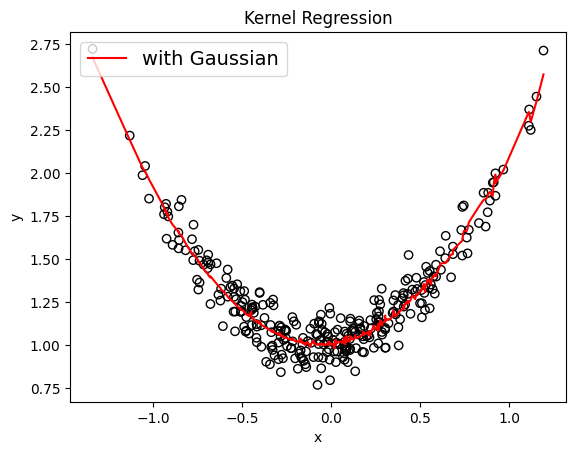

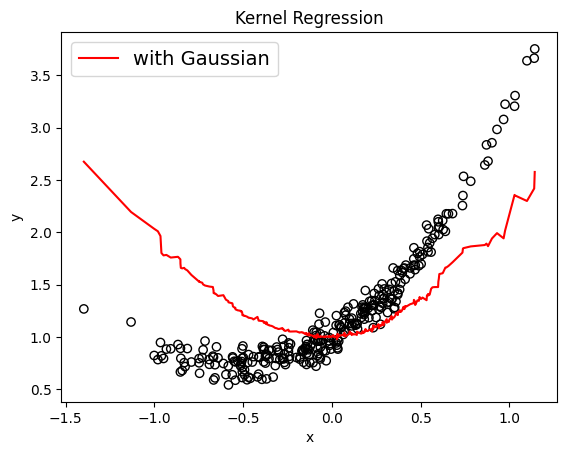

In [ ]:
# Plot for x1 and y1
f1_sort = np.array([x for _,x in sorted(zip(x1,func[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

f2_sort = np.array([x for _,x in sorted(zip(x2,func[1]))])
g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()

### With Random Fourier Features

#### Psi

In [ ]:
def psi(x, w, b):
    return np.sqrt(2) * np.cos(w.T@x + b)

def psi_vector(x, w, b, m):
    psi_vector = np.zeros(m)
    for i in range(m):
        psi_vector[i] = psi(x, w[:, i], b[i])
    return np.array(psi_vector)

def capital_psi(x, w,b, m, dim):
    psi = psi_vector(x,w,b,m)
    return np.kron(psi, np.eye(dim))

capital_psi(x_vector[:, 1], w, b, m, dimension)

array([[-0.76017989, -0.        , -0.59682124, -0.        ,  1.26206399,
         0.        , -0.96554048, -0.        ,  0.85704113,  0.        ,
        -0.0918451 , -0.        , -0.85458303, -0.        , -1.19871535,
        -0.        ,  1.02003215,  0.        , -0.03047946, -0.        ,
         0.73362955,  0.        ,  1.18175541,  0.        ,  0.54779306,
         0.        ,  0.42328779,  0.        , -0.19083165, -0.        ,
         1.327848  ,  0.        , -0.92607637, -0.        , -1.3730213 ,
        -0.        ,  0.46625185,  0.        , -0.68269637, -0.        ],
       [-0.        , -0.76017989, -0.        , -0.59682124,  0.        ,
         1.26206399, -0.        , -0.96554048,  0.        ,  0.85704113,
        -0.        , -0.0918451 , -0.        , -0.85458303, -0.        ,
        -1.19871535,  0.        ,  1.02003215, -0.        , -0.03047946,
         0.        ,  0.73362955,  0.        ,  1.18175541,  0.        ,
         0.54779306,  0.        ,  0.42328779, -0.

#### Phi

In [ ]:
def phi(x, w, b, n, m, dim):
    phi = np.zeros((dim*n, dim*m))
    for i in range(0, n):
        psi = capital_psi(x[:,i], w, b, m, dim)
        phi[dim*i] = psi[0]
        phi[dim*i+1] = psi[1]
    return phi

phi_ = phi(x_vector, w, b, n, m, dimension)
phi_

array([[-0.74164103, -0.        , -0.63322961, ...,  0.        ,
        -0.66773883, -0.        ],
       [-0.        , -0.74164103, -0.        , ...,  0.45045454,
        -0.        , -0.66773883],
       [-0.76017989, -0.        , -0.59682124, ...,  0.        ,
        -0.68269637, -0.        ],
       ...,
       [-0.        , -0.76514484, -0.        , ...,  0.30511629,
        -0.        , -0.76803531],
       [-0.73526617, -0.        , -0.6219935 , ...,  0.        ,
        -0.69080255, -0.        ],
       [-0.        , -0.73526617, -0.        , ...,  0.38938245,
        -0.        , -0.69080255]])

#### Alpha

In [ ]:
def alpha_approx(phi, y, n, dim, m, lam):
    alpha = np.linalg.inv(phi.T @ phi + lam*np.eye(dim*m)) @ (phi.T@y)
    return alpha

alpha_approximation = alpha_approx(phi_, y, n, dimension, m, lam)
alpha_approximation.shape

(40,)

#### Function Approximation

In [ ]:
def function_approximation(alpha, x, n, dim):
    f = np.zeros((dim, n))
    for i in range(n):
        f[:, i] = capital_psi(x[:, i], w, b, m, dim) @ alpha
    return f

# Evt: Gir samme resultat
def func_2(alpha, phi):
    func = phi @ alpha
    return np.array([func[::2], func[1::2]])

function_approximation(alpha_approximation, x_vector, n, dimension)

array([[1.06598511, 1.00608061, 1.28725022, 1.6586233 , 1.33358873,
        1.80051302, 1.04843899, 2.31494536, 1.84305554, 1.66532671,
        1.47676536, 1.00684121, 1.04801852, 0.99980333, 1.14879682,
        1.07511769, 2.65084864, 1.18371673, 1.04382532, 1.48351497,
        1.01741173, 1.07536343, 1.50409596, 1.06224134, 1.19153317,
        1.01565175, 1.00549705, 2.36288698, 1.60992853, 1.55293703,
        1.05575058, 1.1119127 , 1.11240813, 1.37544291, 1.00401768,
        1.25379901, 2.02467498, 1.08848871, 1.35143922, 1.03454201,
        1.13973384, 1.0893786 , 1.26348924, 1.05693004, 1.08082186,
        1.00256778, 1.47674441, 1.41860005, 1.41908254, 1.04209303,
        1.0116044 , 1.31245253, 1.59008214, 0.99591332, 1.00301948,
        1.01088329, 2.36111387, 1.01644334, 1.11807113, 1.21070931,
        0.99849021, 1.14276487, 1.09558948, 1.1431648 , 1.77167328,
        2.01018004, 1.33656069, 1.00979981, 1.40188819, 1.04668428,
        1.12076014, 1.05595801, 1.12652237, 1.39